In [11]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Andrew Kramer"
__contact__   = "andrew.george.kramer@und.edu"

In [12]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import pandas as express

In [13]:
#Constants
a = 0.25
b = 4.0
F = 8.0
G = 1.0
dt = 4/(24*5)

#Variables
x = 2.5
y = 1.0
z = 0.0

In [14]:
#Equations

def dxdt(x,y,z):
    dxdto = -(y**2)-(z**2)-(a*x)+(a*F)
    return dxdto

def dydt(x,y,z):
    dydto = (x*y)-(b*x*z)-y+G
    return dydto

def dzdt(x,y,z):
    dzdto = (b*x*y)+(x*z)-z
    return dzdto

In [15]:
def tat(xat,yat,zat,dt):
    xto = xat + dt*(dxdt(xat,yat,zat))
    yto = yat + dt*(dydt(xat,yat,zat))
    zto = zat + dt*(dzdt(xat,yat,zat))
    
    return([xto,yto,zto])

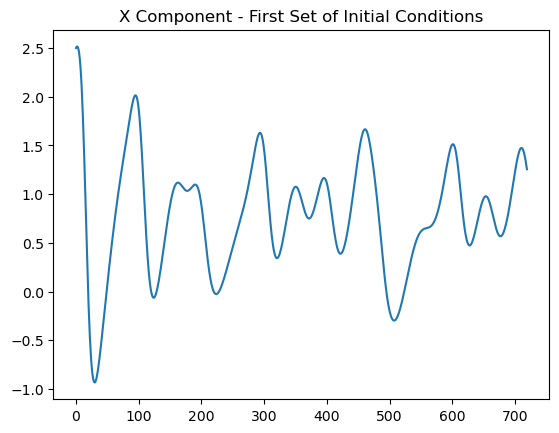

In [16]:
icx = np.empty([720])
icy = np.empty([720])
icz = np.empty([720])

icx[0] = 2.5
icy[0] = 1.0
icz[0] = 0.0

for i in range(1, 720):
    run = tat(icx[i-1],icy[i-1],icz[i-1],dt)
    icx[i] = run[0]
    icy[i] = run[1]
    icz[i] = run[2]
    
plt.plot(icx[:])
plt.title("X Component - First Set of Initial Conditions")
plt.savefig("XcomponentFirstSet")

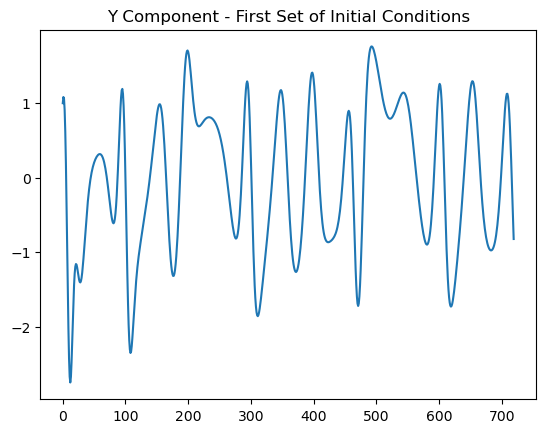

In [17]:
plt.plot(icy[:])
plt.title("Y Component - First Set of Initial Conditions")
plt.savefig("YcomponentFirstSet")

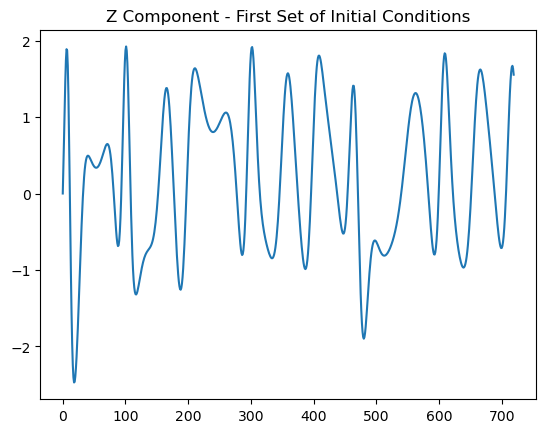

In [18]:
plt.plot(icz[:])
plt.title("Z Component - First Set of Initial Conditions")
plt.savefig("ZcomponentFirstSet")

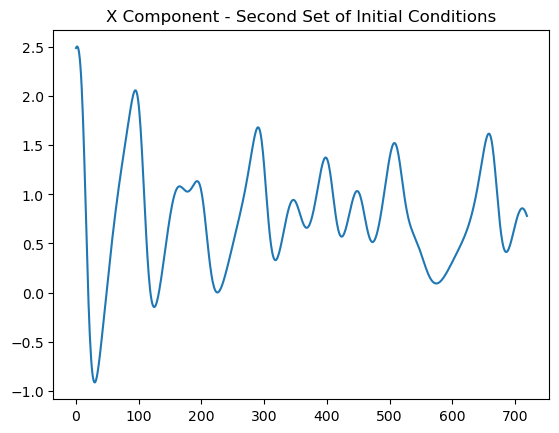

In [19]:
icx2 = np.empty([720])
icy2 = np.empty([720])
icz2 = np.empty([720])

icx2[0] = 2.49
icy2[0] = 1.0
icz2[0] = 0.0

for i in range(1, 720):
    run = tat(icx2[i-1],icy2[i-1],icz2[i-1],dt)
    icx2[i] = run[0]
    icy2[i] = run[1]
    icz2[i] = run[2]
    
plt.plot(icx2[:])
plt.title("X Component - Second Set of Initial Conditions")
plt.savefig("XcomponentSecondSet")

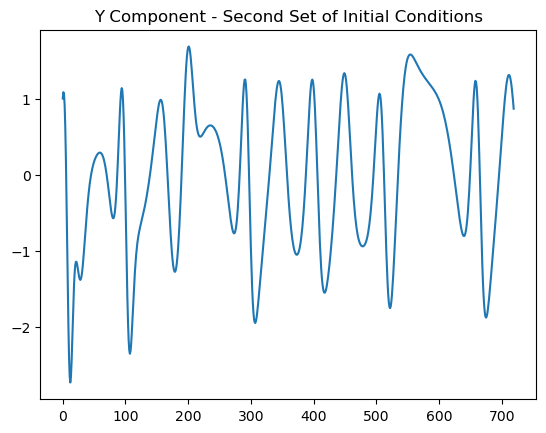

In [20]:
plt.plot(icy2[:])
plt.title("Y Component - Second Set of Initial Conditions")
plt.savefig("XcomponentSecondSet")

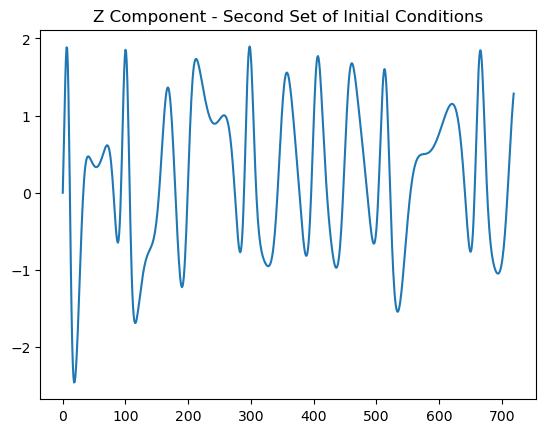

In [21]:
plt.plot(icz2[:])
plt.title("Z Component - Second Set of Initial Conditions")
plt.savefig("XcomponentSecondSet")

In [22]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###

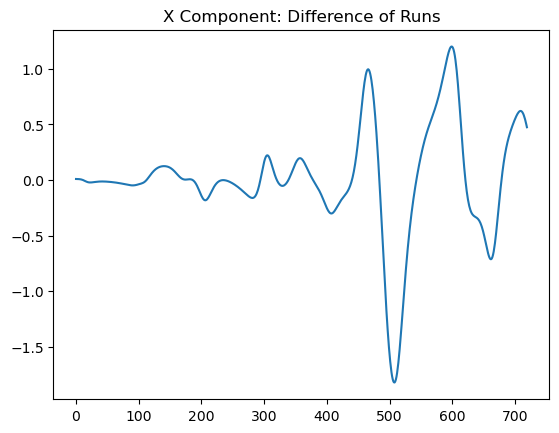

In [23]:
icxd = icx[:]-icx2[:]
plt.plot(icxd[:])
plt.title("X Component: Difference of Runs")
plt.savefig("XcomponentDifference")

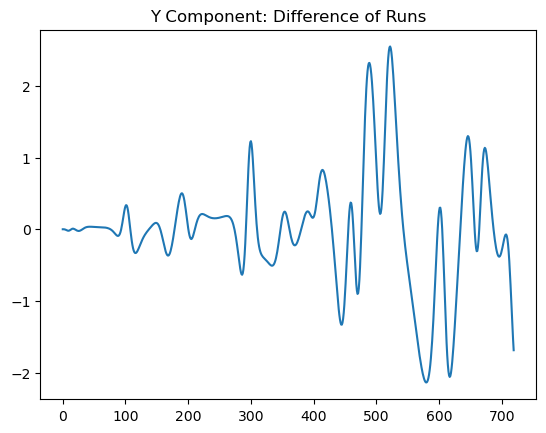

In [24]:
icyd = icy[:]-icy2[:]
plt.plot(icyd[:])
plt.title("Y Component: Difference of Runs")
plt.savefig("YcomponentDifference")

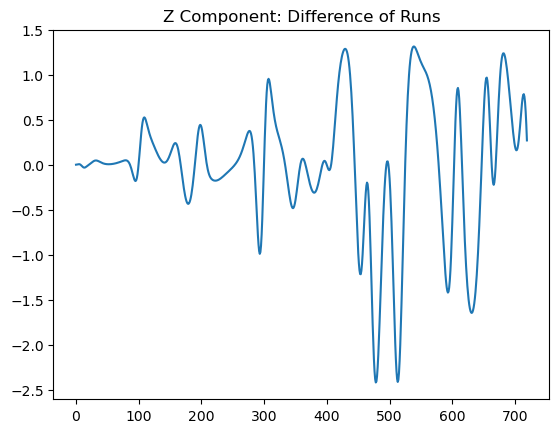

In [25]:
iczd = icz[:]-icz2[:]
plt.plot(iczd[:])
plt.title("Z Component: Difference of Runs")
plt.savefig("ZcomponentDifference")

In [26]:
'''
Discussion of the Results.

No, the simulations are not the same throughout. Between the three components, 
they begin to diverge away from oneanother between the 100th to 200th timestep.
This is shown clearly in my third set of graphs which is the difference between
the results created by the two sets of initial conditions.

All three sets of ending points are at different values. This lab perfectly highlights 
chaos theory and the importance of getting the best initial conditions possible for NWP.
Accurate and balanced initial conditions are key to providing the best possible forecasts.

'''